# Read Cython OpenBCI .xdf data

In [113]:
import pyxdf
import PyQt5
import mne
import numpy as np
import pathlib
import mne
import matplotlib
import matplotlib.pyplot as plt
# For interactive plots
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'qt')

## Set data path and read data

In [114]:
current_path = pathlib.Path().absolute()  
data_fname = current_path /'synth_with_trig2.xdf'
print(data_fname)
streams, header = pyxdf.load_xdf(data_fname)

/Users/ordez/Downloads/BCI_ALS-main/synth_with_trig2.xdf


## before we are able to create a MNE raw instance, we need to create "info" object and prepare the data
(https://mne.tools/stable/auto_tutorials/simulation/10_array_objs.html#sphx-glr-auto-tutorials-simulation-10-array-objs-py)

Look for data[0:13] and data[13:], the first 13 rows should contain the actual electrode while the last 3 contains the Na channels 

## Recording should be 40 sec in total, first trigger after 20 sec, another one after 10 sec

In [115]:
stream_count = 0

for stream in streams:
    if stream['info']['channel_count'] == ['16']:
        eeg_stream = stream
        #data_eeg = stream["time_series"].T
        stream_count += 1
    elif stream['info']['channel_count'] == ['1']:
        marker_stream = stream
        stream_count += 1
    else:
        print('Not recognized channel')

    
print (f'{stream_count} streams loaded') 

# Prepare the time series data

eeg_data = eeg_stream["time_series"].T

2 streams loaded


In [117]:
# lets aling the time of event to the recording onset by seconds
start_time = eeg_stream['time_stamps'][0]
marker_stream['time_stamps'] -= start_time

zeros = np.zeros(len(marker_stream['time_series'])).reshape(2,1)
# need to solve the string thing
event = np.concatenate((marker_stream['time_stamps'].reshape(2,1),zeros,np.array(marker_stream['time_series']).reshape(2,1)),axis = 1)
print (event)

[['18.903325377134024' '0.0' 'here']
 ['29.251058248861227' '0.0' 'here']]


In [ ]:
mapping = {1: 'auditory/left', 2: 'auditory/right', 3: 'visual/left',
           4: 'visual/right', 5: 'smiley', 32: 'buttonpress'}
annot_from_events = mne.annotations_from_events(
    events=events, event_desc=mapping, sfreq=raw.info['sfreq'],
    orig_time=raw.info['meas_date'])
raw.set_annotations(annot_from_events)

In [7]:
# with stim channel

ch_types = ['eeg'] * 13 + ['stim']
ch_names = ['C3','C4','Cz','FC1','FC2','FC5','FC6','CP1','CP2','CP5','CP6','O1','O2']



#data_marker = streams[0]
 
eeg_data = eeg_data[0:13]
#data[:4:2] -= data[1:4:2]  # subtract (rereference) to get two bipolar EEG
#data = data[::2]  # subselect
#data *= 1000
eeg_data *= (1e-6 / 50 / 2)  # Not sure if that is the correct way (uV -> V and preamp gain)
sfreq = float(eeg_stream["info"]["nominal_srate"][0])
info = mne.create_info(ch_names= ch_names, ch_types=ch_types, sfreq=sfreq)
info.set_montage('standard_1020')

<Info | 8 non-empty values
 bads: []
 ch_names: C3, C4, Cz, FC1, FC2, FC5, FC6, CP1, CP2, CP5, CP6, O1, O2
 chs: 13 EEG
 custom_ref_applied: False
 dig: 16 items (3 Cardinal, 13 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 13
 projs: []
 sfreq: 250.0 Hz
>

In [ ]:
# Without sim channel

In [4]:
ch_types = ['eeg'] * 13 
ch_names = ['C3','C4','Cz','FC1','FC2','FC5','FC6','CP1','CP2','CP5','CP6','O1','O2']



#data_marker = streams[0]
 
eeg_data = eeg_data[0:13]
#data[:4:2] -= data[1:4:2]  # subtract (rereference) to get two bipolar EEG
#data = data[::2]  # subselect
#data *= 1000
eeg_data *= (1e-6 / 50 / 2)  # Not sure if that is the correct way (uV -> V and preamp gain)
sfreq = float(eeg_stream["info"]["nominal_srate"][0])
info = mne.create_info(ch_names= ch_names, ch_types=ch_types, sfreq=sfreq)
info.set_montage('standard_1020')

<Info | 8 non-empty values
 bads: []
 ch_names: C3, C4, Cz, FC1, FC2, FC5, FC6, CP1, CP2, CP5, CP6, O1, O2
 chs: 13 EEG
 custom_ref_applied: False
 dig: 16 items (3 Cardinal, 13 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 13
 projs: []
 sfreq: 250.0 Hz
>

Creating RawArray with float64 data, n_channels=13, n_times=9150
    Range : 0 ... 9149 =      0.000 ...    36.596 secs
Ready.
Using matplotlib as 2D backend.


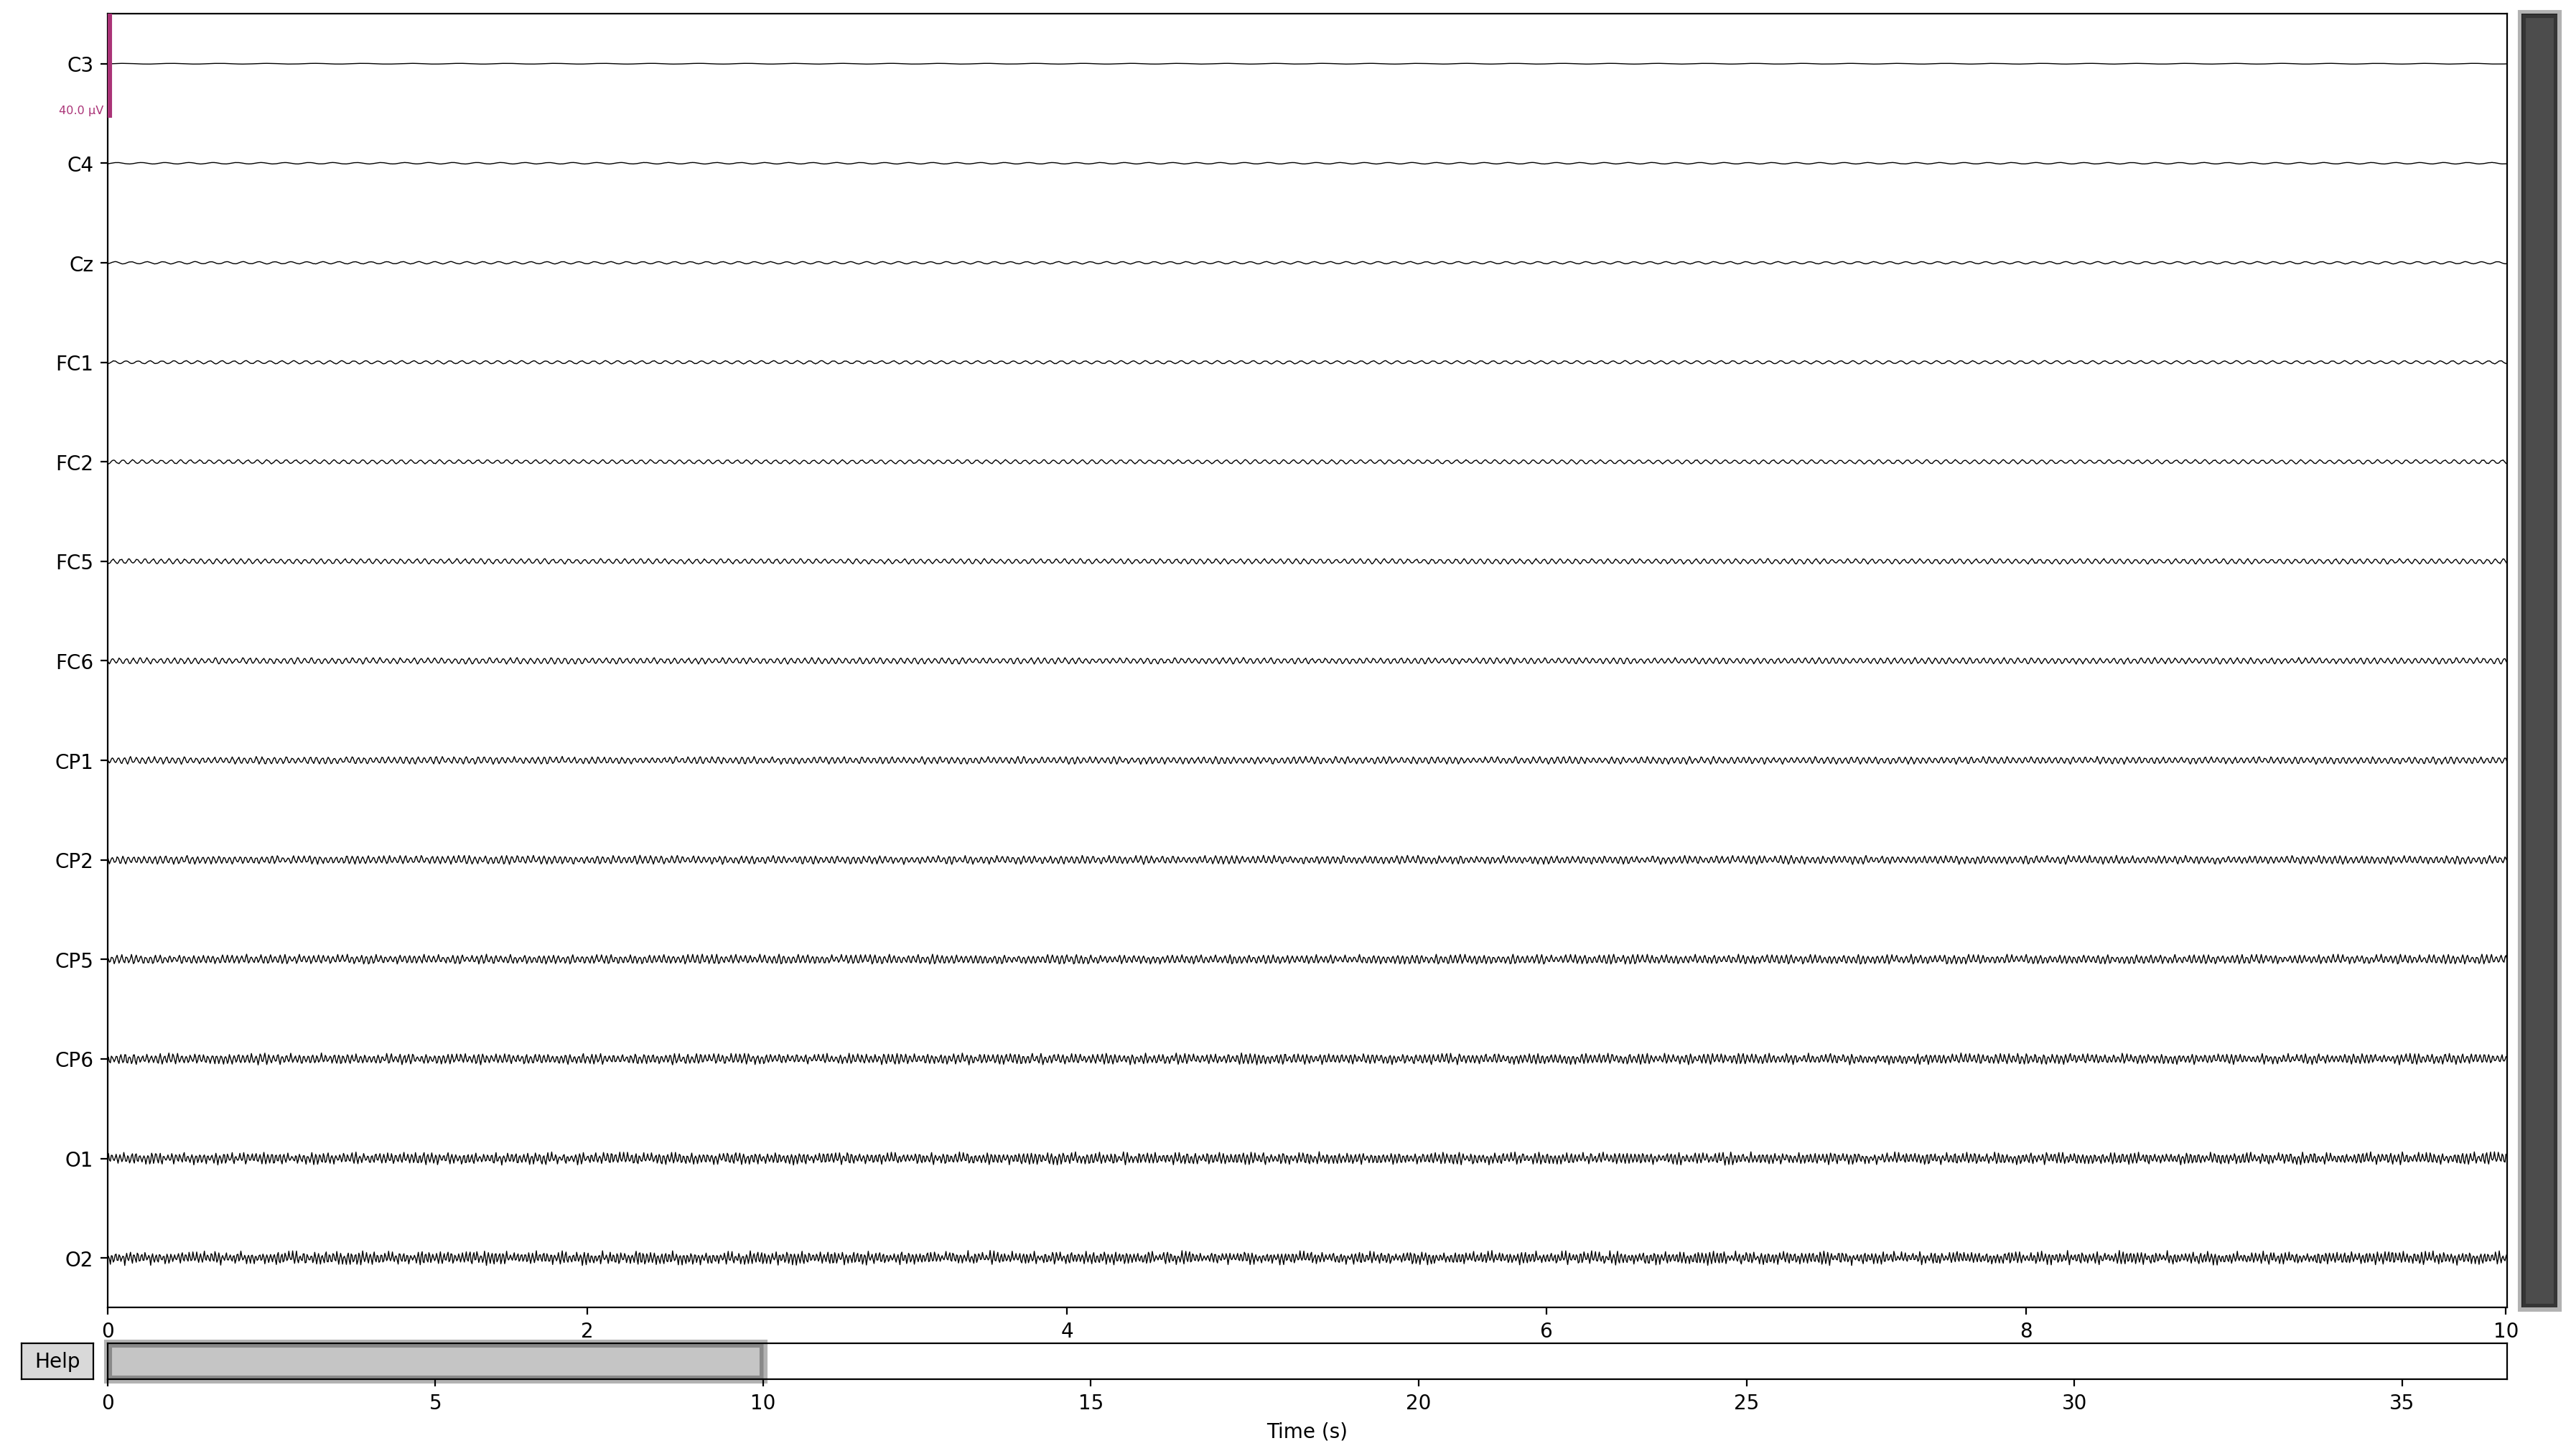

Channels marked as bad:
none


In [5]:
raw = mne.io.RawArray(eeg_data, info)
#raw_filter = raw.filter(l_freq = 0.5, h_freq = 60)
raw.plot()
#raw_filter.plot(scalings=dict(eeg=100e-6), duration=1, start=14)

We can also plot sensor locations:

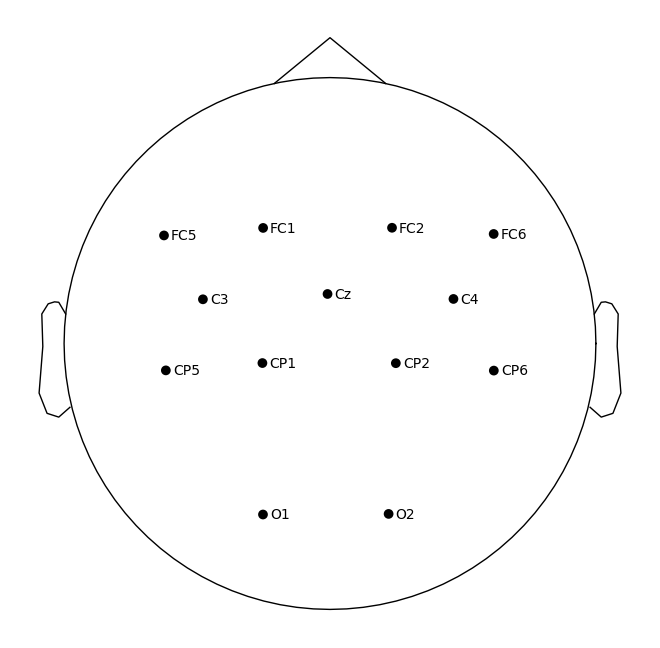

In [5]:
raw.plot_sensors(show_names= True)

In **3d** its even cooler:

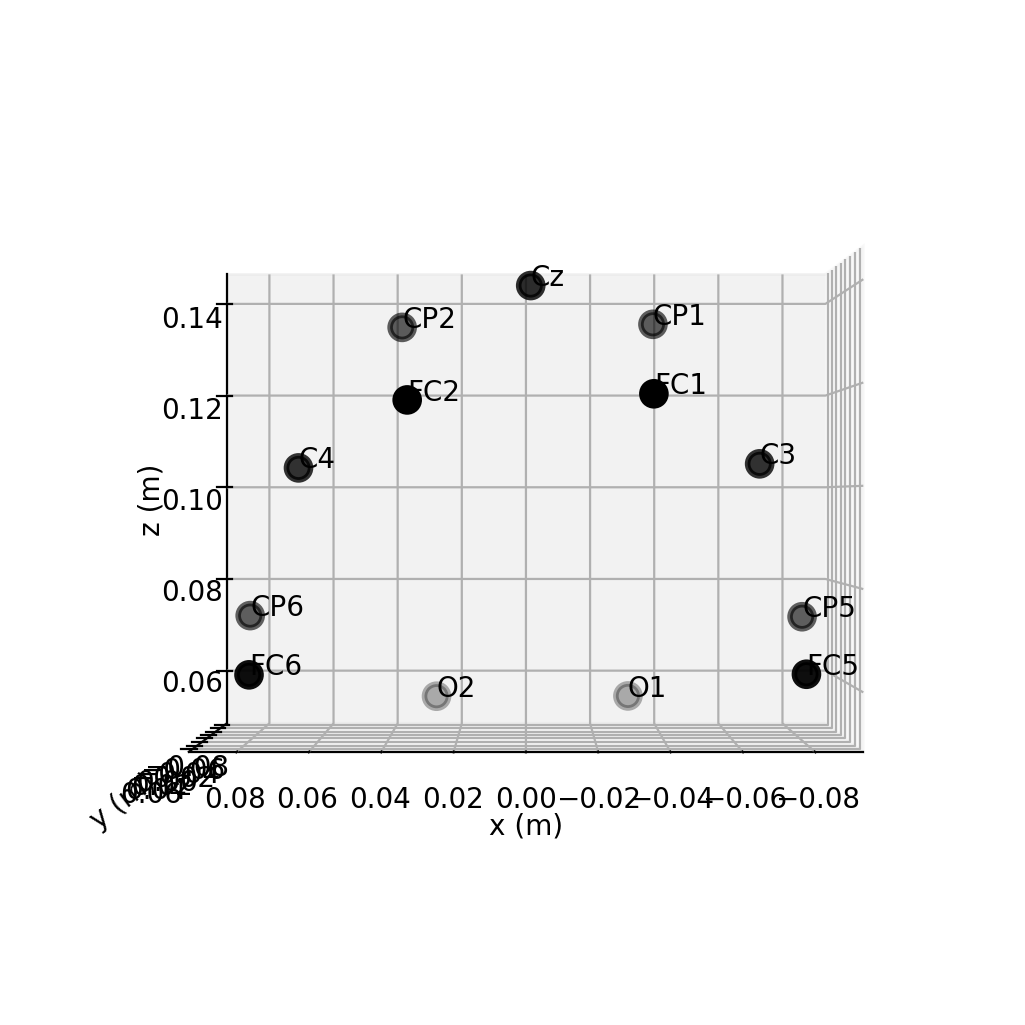

Channels marked as bad:
none


In [5]:
raw.plot_sensors(show_names= True,kind= '3d')